In [1]:
#automatically plot any two variables within certain limits
    # for example, compare run time to 

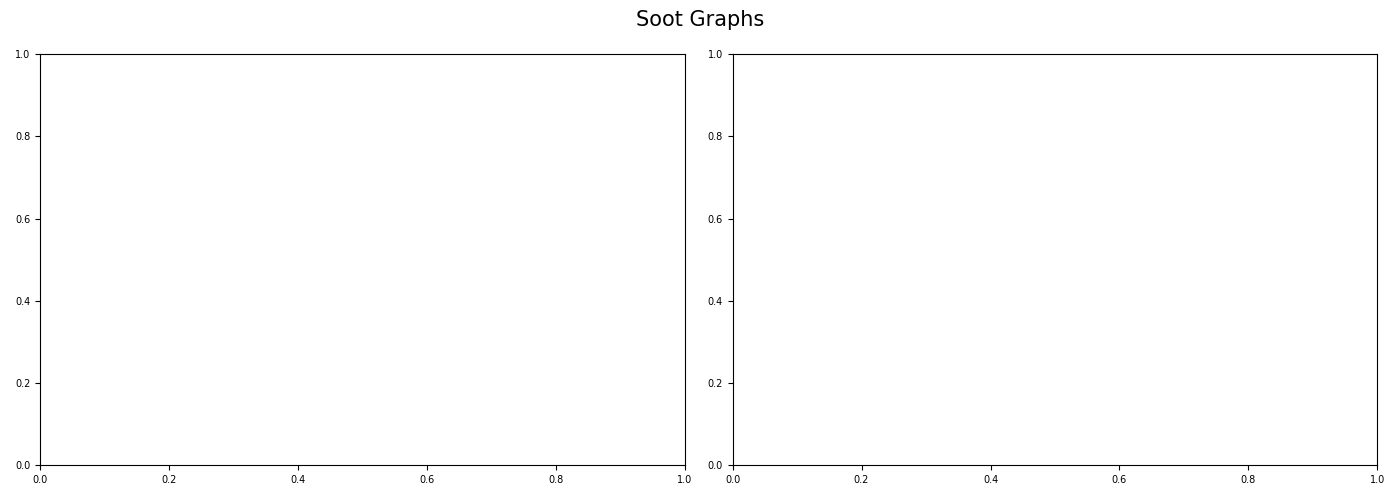

In [1]:
%matplotlib ipympl
import ipywidgets, asyncio, time
import glob
from scipy.signal import savgol_filter
import pandas as pd
# from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.style as mplstyle
from matplotlib.offsetbox import AnchoredText
mpl.rcParams['path.simplify_threshold'] = 1.0
mplstyle.use('fast')


dfPulseFiles =pd.DataFrame(columns =  ["type", "date", "time","df_runtime", "pulse_duration", "starting_sample_temp", "starting_ewm", "peak", "air_setpoint", "propane_setpoint","sampling_flow"])
dfFlushFiles =pd.DataFrame(columns =  ["type", "date", "time","df_runtime", "flush_duration", "starting_sample_temp", "starting_ewm", "low", "air_setpoint", "propane_setpoint","sampling_flow"])

def addFileToDF(fileName,df1,df2):
    fileName = fileName.replace('C:\\Users\\Kyan Shlipak\\Documents\\Solenoid Pulse DataFrames\\ ','',1)
    fileName = fileName.replace('.pkl','',1)    
    items = fileName.split(' ')
    data = []
    for item in items:
        try:
            data.append(float(item))
        except ValueError:
            data.append(item)
            
    if len(data) == 10:
        data.append(50)
    
    if data[0] == "Pulse" and (data[7] not in df1.values or data[6] not in df1.values):
        global dfPulseFiles
        dfPulseFiles = pd.concat([dfPulseFiles, pd.DataFrame([data], columns = ["type", "date", "time","df_runtime", "pulse_duration", "starting_sample_temp", "starting_ewm", "peak", "air_setpoint", "propane_setpoint", "sampling_flow"]) ],ignore_index=True)
    elif data[0] == "Flush" and (data[7] not in df2.values and data[6] not in df2.values):
        global dfFlushFiles
        dfFlushFiles = pd.concat([dfFlushFiles, pd.DataFrame([data], columns = ["type", "date", "time","df_runtime", "flush_duration", "starting_sample_temp", "starting_ewm", "low", "air_setpoint", "propane_setpoint", "sampling_flow"]) ],ignore_index=True)
        
def pulseToFilePath(series):
    return f'C:\\Users\\Kyan Shlipak\\Documents\\Solenoid Pulse DataFrames\\ {series["type"]} {series["date"]} {series["time"]} {str(series["df_runtime"])} {str(series["pulse_duration"])} {str(series["starting_sample_temp"])} {str(series["starting_ewm"])} {str(series["peak"])} {str(series["air_setpoint"])} {str(series["propane_setpoint"])} {str(series["sampling_flow"])}.pkl'

def flushToFilePath(series):
     return f'C:\\Users\\Kyan Shlipak\\Documents\\Solenoid Pulse DataFrames\\ {series["type"]} {series["date"]} {series["time"]} {str(series["df_runtime"])} {str(series["flush_duration"])} {str(series["starting_sample_temp"])} {str(series["starting_ewm"])} {str(series["low"])} {str(series["air_setpoint"])} {str(series["propane_setpoint"])} {str(series["sampling_flow"])}.pkl'
        
def getDF(filePath):
    try:
        df = pd.read_pickle(filePath)
    except OSError as e:
        items = filePath.split(' ')
        items[-1] = ".pkl"
        newPath = ' '.join(items)
        newPath=newPath.replace(' .pkl','.pkl')
        df =  pd.read_pickle(newPath)
    return df

files = glob.glob("C:\\Users\\Kyan Shlipak\\Documents\\Solenoid Pulse DataFrames\\*.pkl")
for file in files:
     addFileToDF(file,dfPulseFiles,dfFlushFiles)
# dfFiles
#{dt_string} {df_runtime} {pulse_duration} {starting_sample_temp} {starting_ewm} {peak} {air_setpoint} {propane_setpoint}

itemLayout = ipywidgets.Layout(height = "auto",width="13.7%")
numberStyle = {'description_width': "50%"}

def colLayout(wid):
    return ipywidgets.Layout(display = "flex",flex_flow='column',border = '0px solid black',align_items = "stretch",justify_content="flex-start",width = wid)

def rowLayout(h):
    return ipywidgets.Layout(display = "flex",flex_flow='row',border = '1px solid black',align_items = "stretch",justify_content="flex-start",height = h,width = "70%")

running = ipywidgets.ToggleButton(description="Get DataFrames", icon="play",button_style = 'danger', layout = itemLayout)
text = ipywidgets.Textarea( layout = itemLayout, value = "status: ")
dataType = ipywidgets.ToggleButtons(options = ['Pulse','Flush'], layout ={'width':'18%'}, description = "data type: ")
xlim = ipywidgets.IntSlider(description="xlim", value=300, min=10, max=1500)
setx = ipywidgets.IntSlider(description="move x", value=0, min=0, max=1500)
slids = ipywidgets.VBox(children = [setx,xlim],layout = {"width":"30%"})

next1 = ipywidgets.Button(description="Next Plot 1", icon="play",layout = {"width":"93%"})
next2 = ipywidgets.Button(description="Next Plot 2", icon="play",layout = {"width":"93%"})
nextButtons = ipywidgets.VBox(children = [next1,next2],layout = colLayout("10%"))
back1 = ipywidgets.Button(description="Back 1", icon="play",layout = {"width":"93%"})
back2 = ipywidgets.Button(description="Back 2", icon="play",layout = {"width":"93%"})
backButtons = ipywidgets.VBox(children = [back1,back2],layout = colLayout("10%"))

maxPulse = ipywidgets.FloatText(description = "pulse time max",value = 1,step = 0.05, layout = ipywidgets.Layout(height = "auto",width="90%"),style = numberStyle)
minPulse = ipywidgets.FloatText(description = "pulse time min",value = 1,step = 0.05, layout = ipywidgets.Layout(height = "auto",width="90%"),style = numberStyle)
pulseDuration = ipywidgets.HBox(children = [minPulse,maxPulse],description = "pulse duration",layout = colLayout("auto"))

maxFlush = ipywidgets.FloatText(description = "flush time max",value = 10000, layout = ipywidgets.Layout(height = "auto",width="90%"),style = numberStyle)
minFlush = ipywidgets.FloatText(description = "flush time min",value = 500, layout = ipywidgets.Layout(height = "auto",width="90%"),style = numberStyle)
flushDuration =  ipywidgets.HBox(children = [minFlush,maxFlush],description = "flush duration",layout = colLayout("auto"))

#"df_runtime", "flush_duration", "starting_sample_temp", "starting_ewm", "low", "air_setpoint", "propane_setpoint"])
maxTime = ipywidgets.FloatText(description = "run time max",value = 500000, layout = ipywidgets.Layout(height = "auto",width="90%"),style = numberStyle)
minTime = ipywidgets.FloatText(description = "run time min",value = 0, layout = ipywidgets.Layout(height = "auto",width="90%"),style = numberStyle)
runTime =  ipywidgets.HBox(children = [minTime,maxTime],description = "run time",layout = colLayout("auto"))

maxTemp = ipywidgets.FloatText(description = "sample temp max",value = 35, layout = ipywidgets.Layout(height = "auto",width="90%"),style = numberStyle)
minTemp = ipywidgets.FloatText(description = "sample temp min",value = 15, layout = ipywidgets.Layout(height = "auto",width="90%"),style = numberStyle)
temp =  ipywidgets.HBox(children = [minTemp,maxTemp],description = "flush duration",layout = colLayout("auto"))

maxStartEwm = ipywidgets.FloatText(description = "starting bcc max",value = 100000, layout = ipywidgets.Layout(height = "auto",width="90%"),style = numberStyle)
minStartEwm = ipywidgets.FloatText(description = "starting bcc min",value = 0, layout = ipywidgets.Layout(height = "auto",width="90%"),style = numberStyle)
startEwm =  ipywidgets.HBox(children = [minStartEwm,maxStartEwm],description = "flush duration",layout = colLayout("auto"))

maxAirSetpoint = ipywidgets.FloatText(description = "air max",value = 20, layout = ipywidgets.Layout(height = "auto",width="90%"),style = numberStyle)
minAirSetpoint = ipywidgets.FloatText(description = "air min",value = 0, layout = ipywidgets.Layout(height = "auto",width="90%"),style = numberStyle)
airSetpoint =  ipywidgets.HBox(children = [minAirSetpoint,maxAirSetpoint],description = "flush duration",layout = colLayout("auto"))

maxPropaneSetpoint = ipywidgets.FloatText(description = "propane max",value = 0.1, step = 0.01,layout = ipywidgets.Layout(height = "auto",width="90%"),style = numberStyle)
minPropaneSetpoint = ipywidgets.FloatText(description = "propane min",value = 0.00, step = 0.01, layout = ipywidgets.Layout(height = "auto",width="90%"),style = numberStyle)
propaneSetpoint =  ipywidgets.HBox(children = [minPropaneSetpoint,maxPropaneSetpoint],description = "flush duration",layout = colLayout("auto"))

duration1 = ipywidgets.FloatText(layout = itemLayout,style = numberStyle)
endBcc1 = ipywidgets.FloatText(description = "end bcc", layout = itemLayout,style = numberStyle)
runTime1 = ipywidgets.FloatText(description = "run time", layout = itemLayout,style = numberStyle)
sampleTemp1 = ipywidgets.FloatText(description = "sample temp", layout = itemLayout,style = numberStyle)
startBcc1 = ipywidgets.FloatText(description = "starting bcc",layout = itemLayout,style = numberStyle)
airSetpoint1 = ipywidgets.FloatText(description = "air setpoint", layout = itemLayout,style = numberStyle)
propaneSetpoint1 = ipywidgets.FloatText(description = "propane setpoint", layout = itemLayout,style = numberStyle)

duration2 = ipywidgets.FloatText(layout = itemLayout,style = numberStyle)
endBcc2 = ipywidgets.FloatText(description = "end bcc", layout = itemLayout,style = numberStyle)
runTime2 = ipywidgets.FloatText(description = "run time", layout = itemLayout,style = numberStyle)
sampleTemp2 = ipywidgets.FloatText(description = "sample temp", layout = itemLayout,style = numberStyle)
startBcc2 = ipywidgets.FloatText(description = "starting bcc",layout = itemLayout,style = numberStyle)
airSetpoint2 = ipywidgets.FloatText(description = "air setpoint", layout = itemLayout,style = numberStyle)
propaneSetpoint2 = ipywidgets.FloatText(description = "propane setpoint", layout = itemLayout,style = numberStyle)

showBcc = ipywidgets.Checkbox(value = False, description = "Show Bcc", layout = itemLayout,indent = False)
showSavgol = ipywidgets.Checkbox(value = True, description = "Show Savgol", layout = itemLayout,indent = False)
showEWM = ipywidgets.Checkbox(value = True, description = "Show EWM", layout = itemLayout,indent = False)
showMax = ipywidgets.Checkbox(value = True, description = "Show max", layout = itemLayout,indent = False)
showMin = ipywidgets.Checkbox(value = True, description = "Show min", layout = itemLayout,indent = False)

misc = ipywidgets.HBox(children = [running,backButtons,nextButtons,text,dataType,slids], layout = rowLayout("10%"))
filters = ipywidgets.HBox(children=[pulseDuration,flushDuration,runTime,temp,startEwm,airSetpoint,propaneSetpoint],layout = rowLayout("10%"))
values1 =  ipywidgets.HBox(children=[duration1,endBcc1,runTime1,sampleTemp1,startBcc1,airSetpoint1,propaneSetpoint1],layout = rowLayout("10%"))
values2 =  ipywidgets.HBox(children=[duration2,endBcc2,runTime2,sampleTemp2,startBcc2,airSetpoint2,propaneSetpoint2],layout = rowLayout("10%"))
checks =  ipywidgets.HBox(children=[showBcc,showEWM,showSavgol,showMax,showMin],layout = rowLayout("10%"))
ui = ipywidgets.VBox(children = [misc,filters,values1,values2,checks],layout = colLayout("100%"))

tasks = dict()

paths = []
plotNum1 = 0
plotNum2 = 1

def changeNext1(x):
    global plotNum1
    plotNum1 = plotNum1 + 1
    
def changeNext2(x):
    global plotNum2
    plotNum2 = plotNum2 + 1
    
def changeBack1(x):
    global plotNum1
    plotNum1 = plotNum1 - 1
    
def changeBack2(x):
    global plotNum2
    plotNum2 = plotNum2 - 1

async def find_data(t):
    #get dataframe of files
    files = glob.glob("C:\\Users\\Kyan Shlipak\\Documents\\Solenoid Pulse DataFrames\\*.pkl")
    for file in files:
        addFileToDF(file,dfPulseFiles,dfFlushFiles)
    text.value = ("status: filtering data")

    #find files that match the filters
    if dataType.value == "Pulse":
        dfMatchingFiles = dfPulseFiles.loc[
            (dfPulseFiles["pulse_duration"] >= minPulse.value) & (dfPulseFiles["pulse_duration"] <= maxPulse.value) &
            (dfPulseFiles["df_runtime"] <= maxTime.value) & (dfPulseFiles["df_runtime"] >= minTime.value) &
            (dfPulseFiles["starting_sample_temp"] <= maxTemp.value) &(dfPulseFiles["starting_sample_temp"] >= minTemp.value) &
            (dfPulseFiles["starting_ewm"] <= maxStartEwm.value) & (dfPulseFiles["starting_ewm"] >= minStartEwm.value) &
            (dfPulseFiles["air_setpoint"] <= maxAirSetpoint.value) & (dfPulseFiles["air_setpoint"] >= minAirSetpoint.value) &
            (dfPulseFiles["propane_setpoint"] <= maxPropaneSetpoint.value) & (dfPulseFiles["propane_setpoint"] >= minPropaneSetpoint.value)
        ]
        for index,row in dfMatchingFiles.iterrows():
            paths.append(pulseToFilePath(row))
            
    elif dataType.value == "Flush":
        #["type", "date", "time","df_runtime", "flush_duration", "starting_sample_temp", "starting_ewm", "low", "air_setpoint", "propane_setpoint"]
        dfMatchingFiles = dfFlushFiles.loc[
            (dfFlushFiles["flush_duration"] >= minFlush.value) & (dfFlushFiles["flush_duration"] <= maxFlush.value) &
            (dfFlushFiles["df_runtime"] <= maxTime.value) & (dfFlushFiles["df_runtime"] >= minTime.value) &
            (dfFlushFiles["starting_sample_temp"] <= maxTemp.value) &(dfFlushFiles["starting_sample_temp"] >= minTemp.value) &
            (dfFlushFiles["starting_ewm"] <= maxStartEwm.value) & (dfFlushFiles["starting_ewm"] >= minStartEwm.value) &
            (dfFlushFiles["air_setpoint"] <= maxAirSetpoint.value) & (dfFlushFiles["air_setpoint"] >= minAirSetpoint.value) &
            (dfFlushFiles["propane_setpoint"] <= maxPropaneSetpoint.value) & (dfFlushFiles["propane_setpoint"] >= minPropaneSetpoint.value)
        ]
        print(dfMatchingFiles)
        for index,row in dfMatchingFiles.iterrows():
            print(flushToFilePath(row))
            paths.append(flushToFilePath(row))
            
async def graph(t,a,b):    
    if a >= len(paths):
        global plotNum1
        plotNum1 = plotNum1 - len(paths)
    
    if b >= len(paths):
        global plotNum2
        plotNum2 = plotNum2 - len(paths)
    
    try:
        df1 = getDF(paths[plotNum1])
        df2 = getDF(paths[plotNum2])
        text.value = f"{str(len(paths))} dataframes fit the filter"
    except IndexError:
        text.value = "no data frames fit the profile"
    
    #update plots
    ax1.clear()
    ax2.clear()
    ax1.set_xlim([df1.shape[0] - (xlim.value+setx.value),df1.shape[0]-setx.value])
    ax2.set_xlim([df2.shape[0] - (xlim.value+setx.value),df2.shape[0]-setx.value])
    ax1.grid()
    ax2.grid()
    
    ax1.set_title(f"plot {plotNum1}",loc='left')
    ax2.set_title(f"plot {plotNum2}",loc='left')
    
    indexMin1 = df1['bc1 ewm'].idxmin()
    Min1 = round(df1['bc1 ewm'].min(),2)
    indexMin2 = df2['bc1 ewm'].idxmin()
    Min2 = round(df2['bc1 ewm'].min(),2)
    indexMax1 = df1['bc1 ewm'].idxmax()
    Max1 = round(df1['bc1 ewm'].max(),2)
    indexMax2 = df2['bc1 ewm'].idxmax()
    Max2 = round(df2['bc1 ewm'].max(),2)
    MM =[Min1,Min2,Max1,Max2]    
        
    if showBcc.value: 
        ax1.plot(df1["ir bcc"], label = "IR BCC", color = "black")
        ax2.plot(df2["ir bcc"], label = "IR BCC", color = "black")
        showMax.value = False
        showMin.value = False
    if showEWM.value: 
        ax1.plot(df1["bc1 ewm"], label = "Bc1 EWM", color = "blue")
        ax2.plot(df2["bc1 ewm"], label = "Bc1 EWM", color = "blue")
    if showMax.value:
        ax1.annotate(' ',xy = (indexMax1,Max1+(max(MM)-min(MM))*0.06), arrowprops = dict(facecolor = 'green',shrink = 0.05),)
        ax2.annotate(' ',xy = (indexMax2,Max2+(max(MM)-min(MM))*0.06), arrowprops = dict(facecolor = 'green',shrink = 0.05),)
    if showMin.value:
        ax1.annotate(text = ' ',xy = (indexMin1,Min1), arrowprops = dict(facecolor = 'red',shrink = 0.05),)
        ax2.annotate(text = ' ',xy = (indexMin2,Min2), arrowprops = dict(facecolor = 'red',shrink = 0.05),)
    if showSavgol.value:
        ax1.plot(savgol_filter(df1["bc1 ewm"].to_numpy(), 50, 4),label = "bc1 savgol",color = "cyan")
        ax2.plot(savgol_filter(df2["bc1 ewm"].to_numpy(), 50, 4),label = "bcc savgol",color = "cyan")
        
        
    ax1.add_artist(AnchoredText( f'Min: {Min1}, Max: {Max1}',loc = 'upper right'))
    ax2.add_artist(AnchoredText( f'Min: {Min2}, Max: {Max2}',loc = 'upper right'))
    
    ax1.set_ylim(min(MM)-200,max(MM)*1.1)
    ax2.set_ylim(min(MM)-200,max(MM)*1.1)
    
    ax1.legend(loc="upper left")
    ax2.legend(loc="upper left")
    fig.canvas.draw()
    fig.canvas.flush_events()
    
    #update values
    #[,runTime1,sampleTemp1,]
    
    
    duration1.description = paths[0].split(' ')[4] + " duration"
    duration2.description = paths[0].split(' ')[4] + " duration"
    duration1.value = float(paths[plotNum1].split(' ')[8])
    duration2.value = float(paths[plotNum2].split(' ')[8])
    startBcc1.value = float(paths[plotNum1].split(' ')[10])
    startBcc2.value = float(paths[plotNum2].split(' ')[10])
    endBcc1.value = df1.at[df1.shape[0]-1,"bc1 ewm"]
    endBcc2.value = df2.at[df2.shape[0]-1,"bc1 ewm"]
    runTime1.value = float(paths[plotNum1].split(' ')[7])
    runTime2.value = float(paths[plotNum2].split(' ')[7])
    sampleTemp1.value = float(paths[plotNum1].split(' ')[9])
    sampleTemp2.value = float(paths[plotNum2].split(' ')[9])
    propaneSetpoint1.value = float(paths[plotNum1].split(' ')[13].replace('.pkl','',1))
    propaneSetpoint2.value = float(paths[plotNum2].split(' ')[13].replace('.pkl','',1))
    airSetpoint1.value = float(paths[plotNum1].split(' ')[12])
    airSetpoint2.value = float(paths[plotNum2].split(' ')[12])
    
async def do_loop():
    t = 0
    paths.clear()
    asyncio.get_event_loop().create_task(find_data(t))
    while running.value:  
        asyncio.get_event_loop().create_task(graph(t,plotNum1,plotNum2))
        t += 1
        await asyncio.sleep(0.5)

def on_running_changed(*change):
    task = tasks.pop("do_loop", None)
    text.value = f"maybe stopping {task}..."
   
    if task:
        text.value = f"status: stopping {task}..."
        task.cancel()

    if running.value:
        text.value = "status: starting..."
        tasks["do_loop"] = asyncio.get_event_loop().create_task(do_loop())

        
#customize plot font sizes
plt.rc('axes',titlesize=10)
plt.rc('xtick',labelsize=7)
plt.rc('ytick',labelsize=7)
plt.rc('legend',fontsize = 8)
plt.rc('figure',titlesize = 15)
plt.rcParams['lines.linewidth'] = 1

#create "mosaic" customizing grid layout. Semicolons separate rows
fig,(ax1,ax2) = plt.subplots(1,2)
fig.set_size_inches(14,5)
fig.suptitle("Soot Graphs")
plt.tight_layout()
plt.subplots_adjust(hspace = 0.2)
plt.ion()
#fig.canvas.draw()

next1.on_click(changeNext1)
next2.on_click(changeNext2)
back1.on_click(changeBack1)
back2.on_click(changeBack2)
running.observe(on_running_changed, "value")
ui

In [49]:
dfFlushFiles

,type,date,time,df_runtime,flush_duration,starting_sample_temp,starting_ewm,low,air_setpoint,propane_setpoint,sampling_flow
0,Flush,2022-06-30,11-52-55,1047.42,242.93,28.57,30822.17,15743.69218,0.00000,0.07,50
1,Flush,2022-06-30,12-46-17,4249.46,433.01,29.31,5860.82,2944.03936,0.00000,0.07,50
2,Flush,2022-06-30,13-13-15,5867.60,1095.03,29.52,16988.09,2187.45571,0.00000,0.00,50
3,Flush,2022-06-30,14-06-16,9048.47,2155.99,29.84,13859.41,-1012.18797,0.00000,0.01,50
4,Flush,2022-06-30,14-30-06,1241.88,491.11,29.81,8352.19,3661.59515,14.15850,0.06,50
5,Flush,2022-06-30,14-30-22,1257.85,10.94,29.82,4922.71,3226.39959,9.91095,0.00,50
6,Flush,2022-06-30,14-37-12,1667.82,400.85,29.82,4549.79,2895.60433,9.91095,0.02,50
7,Flush,2022-06-30,14-50-40,2475.74,188.97,30.02,11850.95,6401.53540,0.00000,0.07,50
8,Flush,2022-06-30,14-57-28,2883.84,286.97,30.09,12543.38,8759.75880,0.00000,0.07,50
9,Flush,2022-06-30,15-06-44,3440.03,397.20,30.24,14684.72,10008.05019,0.00000,0.07,50


Task exception was never retrieved
future: <Task finished name='Task-1318' coro=<graph() done, defined at C:\Users\Kyan Shlipak\AppData\Local\Temp\ipykernel_1396\2698497930.py:200> exception=FileNotFoundError(2, 'No such file or directory')>
Traceback (most recent call last):
  File "C:\Users\Kyan Shlipak\AppData\Local\Temp\ipykernel_1396\2698497930.py", line 47, in getDF
    df = pd.read_pickle(filePath)
  File "c:\users\kyan shlipak\appdata\local\programs\python\python39-32\lib\site-packages\pandas\io\pickle.py", line 196, in read_pickle
    with get_handle(
  File "c:\users\kyan shlipak\appdata\local\programs\python\python39-32\lib\site-packages\pandas\io\common.py", line 710, in get_handle
    handle = open(handle, ioargs.mode)
FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Kyan Shlipak\\Documents\\Solenoid Pulse DataFrames\\ Flush 2022-06-30 13-13-15 5867.6 1095.03 29.52 16988.09 2187.45571 0.0 0.0 50.pkl'

During handling of the above exception, another excep

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[534440.4966029327, 632695.3580264375, 776996.6685527969, 959675.2419650785, 984866.544358581]
[632695.3580264375, 776996.6685527969, 959675.2419650785, 984866.544358581]
sums: 838558.4532257234


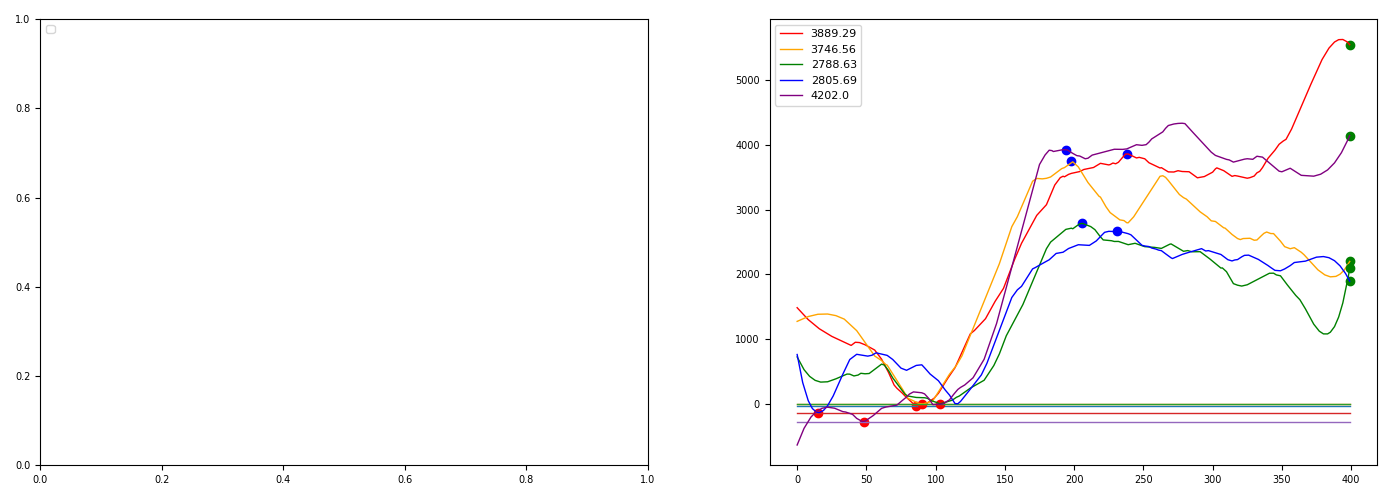

In [33]:
#plot all flush chambers

%matplotlib ipympl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema
import scipy.optimize
from scipy.signal import find_peaks
from scipy.signal import savgol_filter

fig2,(ax3, ax4) = plt.subplots(1,2)
fig2.set_size_inches(14,5)
plt.tight_layout()
plt.subplots_adjust(hspace = 0.2,wspace = 0.2)
plt.ion()
fig2.canvas.draw()

def addFileToDF(fileName,df1,df2):
    fileName = fileName.replace('C:\\Users\\Kyan Shlipak\\Documents\\Solenoid Pulse DataFrames\\ ','',1)
    fileName = fileName.replace('.pkl','',1)    
    items = fileName.split(' ')
    data = []
    for item in items:
        try:
            data.append(float(item))
        except ValueError:
            data.append(item)
            
    if len(data) == 10:
        data.append(50)
    
    if data[0] == "Pulse" and (data[7] not in df1.values or data[6] not in df1.values):
        df1 = pd.concat([df1, pd.DataFrame([data], columns = ["type", "date", "time","df_runtime", "pulse_duration", "starting_sample_temp", "starting_ewm", "peak", "air_setpoint", "propane_setpoint", "sampling_flow"]) ],ignore_index=True)
    elif data[0] == "Flush" and (data[7] not in df2.values and data[6] not in df2.values):
        df2 = pd.concat([df2, pd.DataFrame([data], columns = ["type", "date", "time","df_runtime", "flush_duration", "starting_sample_temp", "starting_ewm", "low", "air_setpoint", "propane_setpoint", "sampling_flow"]) ],ignore_index=True)
        
    return [df1, df2]
def pulseToFilePath(series):
    return f'C:\\Users\\Kyan Shlipak\\Documents\\Solenoid Pulse DataFrames\\ {series["type"]} {series["date"]} {series["time"]} {str(series["df_runtime"])} {str(series["pulse_duration"])} {str(series["starting_sample_temp"])} {str(series["starting_ewm"])} {str(series["peak"])} {str(series["air_setpoint"])} {str(series["propane_setpoint"])} {str(series["sampling_flow"])}.pkl'

def flushToFilePath(series):
     return f'C:\\Users\\Kyan Shlipak\\Documents\\Solenoid Pulse DataFrames\\ {series["type"]} {series["date"]} {series["time"]} {str(series["df_runtime"])} {str(series["flush_duration"])} {str(series["starting_sample_temp"])} {str(series["starting_ewm"])} {str(series["low"])} {str(series["air_setpoint"])} {str(series["propane_setpoint"])} {str(series["sampling_flow"])}.pkl'
        
def getDF(filePath):
    try:
        df = pd.read_pickle(filePath)
    except OSError as e:
        items = filePath.split(' ')
        items[-1] = ".pkl"
        newPath = ' '.join(items)
        newPath=newPath.replace(' .pkl','.pkl')
        df =  pd.read_pickle(newPath)
    return df

def commonValue(bccAll):
    vals = []
    for arr in bccAll:
        twoHundreds = []
        for i in arr:
            x = int(i/200)*200
            if x not in twoHundreds:
                twoHundreds.append(x)
        vals.append(twoHundreds)
        
    #find common value
    s = None
    for lista in vals:
        if not s:
            s = set(lista)
        else:
            s &= set(lista)
    listS = list(s)
    listS.sort()
    return(listS[int(len(listS)/2)])

def plotFlushSamePlot(axis, pullRate,paths):
    maxval = 0
    bccAll = []
    for i in range(len(paths)):
        fileName = paths[i].replace('C:\\Users\\Kyan Shlipak\\Documents\\Solenoid Pulse DataFrames\\ ','',1)
        fileName = fileName.replace('.pkl','',1)    
        items = fileName.split(' ')
        if int(float(items[-1])) == pullRate:
            bccAll.append(getDF(paths[i])["bc1 ewm"].to_numpy())
            if max(getDF(paths[i])["bc1 ewm"].to_numpy()) > maxval: maxval = max(getDF(paths[i])["bc1 ewm"].to_numpy())
    plots = []
    
    ys = []
    
    for bccvals in bccAll:
        yhat = savgol_filter(bccvals, 70, 4)
        [m,T] = fit(axis, range(len(yhat)),yhat,(40000,0.01),False)
        x = list(range(len(yhat)))
        y = []
        for i in x:
            y.append(int(m*np.e**(-(T)*i)))
        ys.append(y)

    
    commonval = commonValue(ys)
    
    for bccvals in bccAll:
        yhat = savgol_filter(bccvals, 70, 4)
        commonIndex = np.where((yhat >= commonval - 150) & (yhat <= commonval + 150) )[0][0]
        x = list(range(-commonIndex, -commonIndex+len(yhat)))
            
        #plt.plot(bccvals)
        axis.plot(x,yhat)
        plots.append([x,yhat])
        
    axis.set_ylim([0,maxval+4000])
    return flushLineBestFit(axis, plots)

def monoExp(x, m, t):
    return m * np.exp(-t * x)

def fit(axis, xs,ys,p0,graph):
    xs = np.array(xs)
    startx = int(xs[0])
    xs = xs-startx
    
    # perform the fit
    params, cv = scipy.optimize.curve_fit(monoExp, xs, ys, p0)
    m, t = params

    # determine quality of the fit
    squaredDiffs = np.square(ys - monoExp(xs, m, t))
    squaredDiffsFromMean = np.square(ys - np.mean(ys))
    rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)

    m = round(m,2)
    t = round(t,7)
    # plot the results
    if graph:axis.plot(xs+startx, monoExp(xs, m, t), '--', label=f"Y = {m} * e^(-{t} * x)")
    
    # inspect the parameters
    return [m,t]
    
def extrapolate():
    pass
        
def flushLineBestFit(axis, flushPlots):
    df = pd.DataFrame(columns = ["x","y"])
    for pair in flushPlots:
        data = {"x":pair[0],"y":pair[1]}
        newdf = pd.DataFrame(data)
        newdf.set_index('x',inplace = True)
        df = pd.concat([df,newdf],axis = 1)
        fit(axis, pair[0],pair[1],(40000,0.01),False)
    df_means = df.mean(axis = 1)
    #df_means.index.tolist()
    vals = []
    vals = np.polyfit(df_means.index.tolist(), df_means.tolist(),2)
    return fit(axis, df_means.index.tolist(), df_means.tolist(), (40000,0.01),True)
                             
def getPeaks(yhat, estimatedLag):
    #find initial peaks
    peaks,t = find_peaks(yhat[:(270+estimatedLag)], distance=60)
    realPeaks = []
            
    #sort out peaks from before the pulse
    ipeaks = []
    for i in range(len(peaks)):
        if peaks[i] > (95+estimatedLag) and peaks[i] < 230+estimatedLag:
            ipeaks.append(peaks[i])
        if len(ipeaks) > 1:
            x = []
            for i in range(len(ipeaks)):
                x.append(yhat[ipeaks[i]])
            ipeaks = [ipeaks[x.index(max(x))]]
    return(ipeaks)
                             
def plotPulseSamePlot(axis, pullRate, maxlines, paths, estimatedLag):
    dis = []
    slopes = []
    sums = []
    colors = ["red","orange","green","blue","purple","magenta","grey","black","brown"]
    newpaths = paths
        
    for path in range(len(newpaths)):
        bccvals = getDF(newpaths[path])["bc1 ewm"].to_numpy()
        fileName = newpaths[path].replace('C:\\Users\\Kyan Shlipak\\Documents\\Solenoid Pulse DataFrames\\ ','',1)
        fileName = fileName.replace('.pkl','',1)    
        items = fileName.split(' ')
        if len(bccvals) >= 400 and int(float(items[-1])) == pullRate:
            yhat = savgol_filter(bccvals, 70, 3)

            #have them all start at the same y 
            #starty = yhat[0]
            minima = argrelextrema(yhat[0:(120+estimatedLag)], np.less)
            minimay = yhat[0:(120+estimatedLag)][argrelextrema(yhat[0:(120+estimatedLag)], np.less)]
            for i in range(len(yhat)):
                yhat[i] = yhat[i] - minimay[-1]
                bccvals[i] = bccvals[i] -  minimay[-1]
            
            peaks = getPeaks(yhat,estimatedLag)
            axis.plot(peaks[0], yhat[peaks[0]], "o",color ="blue")
            
            #plot line of best fit for beginning
            xfit = list(range((120+estimatedLag)))
            m,b = np.polyfit(xfit,yhat[:(120+estimatedLag)],1)
            yfit = list((val*m+b) for val in xfit)
            #ax3.plot(xfit,yfit,color = colors[path%len(colors)])
            
            #find and plot minima
            minima = list(argrelextrema(yhat[0:(120+estimatedLag)], np.less))
            minimay = yhat[0:(120+estimatedLag)][argrelextrema(yhat[0:(120+estimatedLag)], np.less)]
            #minimaValue = min(minimay)
            ##minimayIndex = np.where(minimay == minimaValue)[-1]
            #minimaIndex = minima[minimayIndex]
            minIndex = minima[0][np.where(minimay == min(minimay))[-1][-1]]
            minValue =  min(minimay)
            #print(minima.index(minimaValue))
            axis.plot(minIndex,minValue,'o',color = 'red')
            axis.plot(range(400),[minValue]*400)
            
            xstop = 399
            for i in range(peaks[0],400):
                if yhat[i] < minValue:
                    xstop = i
                    break
                    
            axis.plot(xstop,yhat[xstop],'o',color = "green")

                    
            
            Sum = 0
            for i in range(minIndex,xstop):
                Sum += yhat[i]
            sums.append(Sum)

            
            #calculate average jump
            dis.append(yhat[peaks[0]] - minValue)
            slopes.append(m)
            #axis.plot(bccvals)
            axis.plot(yhat,color = colors[path%len(colors)],label = str(round(yhat[peaks[0]] - minValue,2)) )
    sums.sort()
    print(sums)
    if sums[-1] > sums[-2]*4: sums.pop(-1)
    sums.pop(0)
    print(sums)
    print("sums:", np.mean(sums))
    return {'area':np.mean(sums),'jump':np.mean(dis)}


m = 0
T = 0
def dydt(x):
    return m * (-T) * np.e**((-T) * x) 

def y(x):
    return m * np.e**(-T * x)

dfFlushFiles = dfFlushFiles.sort_values(by = ["date","time"], ascending = False,ignore_index=True)
dur = dfFlushFiles.at[0,"sampling_flow"]
recFlushFiles = []
for index, row in dfFlushFiles.iterrows():
    if index < 10 and index > 3:
        if row["sampling_flow"] == dur:
            if float(row["flush_duration"])>700:
                recFlushFiles.append(flushToFilePath(row))

dfPulseFiles = dfPulseFiles.sort_values(by = ["date","time"], ascending = False,ignore_index=True)
dur = dfPulseFiles.at[0,"pulse_duration"]
recPulseFiles = []
for index, row in dfPulseFiles.iterrows():
    if row["pulse_duration"] == 3 and index < 120:
        recPulseFiles.append(pulseToFilePath(row))

fig2.canvas.draw()
#[m,T] = plotFlushSamePlot(ax3, 1050,recFlushFiles)
#plotFlushSamePlot(ax4, 50,recFlushFiles)
#x = 1/(-T) * np.log(30000/m)
#print("dydt",dydt(x))
#print("30k - dydt * x",30000 - dydt(x))

#plotPulseSamePlot(ax3,150,10)
plotPulseSamePlot(ax4,50,3,recPulseFiles,20)
ax3.legend(loc = "upper left")
ax4.legend(loc = "upper left")


In [12]:
import os
def changeDateFormat():
    for file in files:
        if 'C:\\Users\\Kyan Shlipak\\Documents\\Solenoid Pulse DataFrames\\ ' in file:
            newFile = file.replace('C:\\Users\\Kyan Shlipak\\Documents\\Solenoid Pulse DataFrames\\ ','',1)
        else:
            newFile = file.replace('C:\\Users\\Kyan Shlipak\\Documents\\Solenoid Pulse DataFrames\\','',1)
        fileArr = newFile.split(' ')
        print(fileArr[1])
        date = fileArr[1]
        if date == "2022-07-14":
            fileArr[10] = "1050.0.pkl"
        else: newFilePath = file
        newFilePath = 'C:\\Users\\Kyan Shlipak\\Documents\\Solenoid Pulse DataFrames\\ ' + ' '.join(fileArr)
        print(newFilePath)
        #os.rename(file,newFilePath)

changeDateFormat()

2022-06-30
C:\Users\Kyan Shlipak\Documents\Solenoid Pulse DataFrames\ Flush 2022-06-30 11-52-55 1047.42 242.93 28.57 30822.17 15743.69218 0.0 0.07 50.0.pkl
2022-06-30
C:\Users\Kyan Shlipak\Documents\Solenoid Pulse DataFrames\ Flush 2022-06-30 12-46-17 4249.46 433.01 29.31 5860.82 2944.03936 0.0 0.07 50.0.pkl
2022-06-30
C:\Users\Kyan Shlipak\Documents\Solenoid Pulse DataFrames\ Flush 2022-06-30 13-13-15 5867.6 1095.03 29.52 16988.09 2187.45571 0.0 0.0 50.0.pkl
2022-06-30
C:\Users\Kyan Shlipak\Documents\Solenoid Pulse DataFrames\ Flush 2022-06-30 14-06-16 9048.47 2155.99 29.84 13859.41 -1012.18797 0.0 0.01 50.0.pkl
2022-06-30
C:\Users\Kyan Shlipak\Documents\Solenoid Pulse DataFrames\ Flush 2022-06-30 14-30-06 1241.88 491.11 29.81 8352.19 3661.59515 14.1585 0.06 50.0.pkl
2022-06-30
C:\Users\Kyan Shlipak\Documents\Solenoid Pulse DataFrames\ Flush 2022-06-30 14-30-22 1257.85 10.94 29.82 4922.71 3226.39959 9.91095 0.0 50.0.pkl
2022-06-30
C:\Users\Kyan Shlipak\Documents\Solenoid Pulse DataFra

FileNotFoundError: [WinError 2] The system cannot find the file specified: 'C:\\Users\\Kyan Shlipak\\Documents\\Solenoid Pulse DataFrames\\Flush 2022-07-14 13-23-01 1974.34 1953.21 23.12 95117.51 61.25526 14.1585 0.07 1050.0.pkl' -> 'C:\\Users\\Kyan Shlipak\\Documents\\Solenoid Pulse DataFrames\\ Flush 2022-07-14 13-23-01 1974.34 1953.21 23.12 95117.51 61.25526 14.1585 0.07 1050.0.pkl'

In [30]:
os.rename('C:\\Users\\Kyan Shlipak\\Documents\\Solenoid Pulse DataFrames\\Pulse 2022-07-15 14-20-16 2391.18 2.0 31.22 2857.8 6970.29213 7.0 0.07 50.0.pkl','C:\\Users\\Kyan Shlipak\\Documents\\Solenoid Pulse DataFrames\\ Pulse 2022-07-15 14-20-16 2391.18 2.0 31.22 2857.8 6970.29213 7.0 0.07 50.0.pkl')

In [12]:
x = [3,4,4,3,5,7,8,6,4,6]
print(x[1:])

[4, 4, 3, 5, 7, 8, 6, 4, 6]
